# Examples for lolviz

## Install
If on mac, I had to do this:

```bash
$ brew install graphviz  # had to upgrade graphviz on el capitan
```

Then

```bash
$ pip install lolviz
```

## Sample visualizations

In [1]:
from lolviz import *

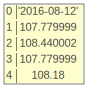

In [2]:
objviz([u'2016-08-12',107.779999,108.440002,107.779999,108.18])

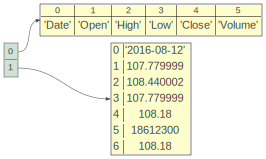

In [3]:
table = [
    ['Date','Open','High','Low','Close','Volume'],
    ['2016-08-12',107.779999,108.440002,107.779999,108.18,18612300,108.18],
]
objviz(table)

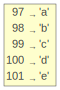

In [4]:
d = dict([(c,chr(c)) for c in range(ord('a'),ord('f'))])
objviz(d)

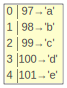

In [5]:
tuplelist = d.items()
listviz(tuplelist)

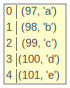

In [6]:
tuplelist = d.items()
listviz(tuplelist, showassoc=False)

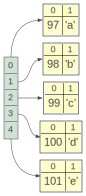

In [7]:
objviz(tuplelist)

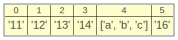

In [8]:
T = ['11','12','13','14',['a','b','c'],'16']
lolviz(T)

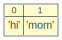

In [9]:
objviz({'hi','mom'})

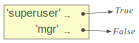

In [10]:
objviz({'superuser':True, 'mgr':False})

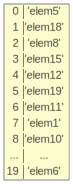

In [11]:
objviz(set(['elem%d'%i for i in range(20)])) # long set shown vertically

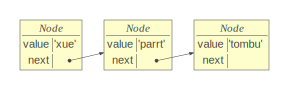

In [12]:
# test linked list node
class Node:
    def __init__(self, value, next=None):
        self.value = value
        self.next = next

head = Node('tombu')
head = Node('parrt', head)
head = Node("xue", head)
objviz(head)

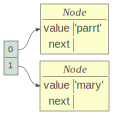

In [13]:
a = {Node('parrt'),Node('mary')}
objviz(a)

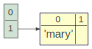

In [14]:
head2 = ('parrt',('mary',None))
objviz(head2)

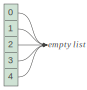

In [15]:
data = [[]] * 5  # INCORRECT list of list init
lolviz(data)

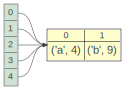

In [16]:
data[0].append( ('a',4) )
data[2].append( ('b',9) ) # whoops! should be different list object
lolviz(data)

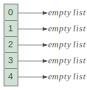

In [17]:
table = [ [] for i in range(5) ] # correct way to init
lolviz(table)

hashcode = 97
bucket_index = 2


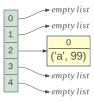

In [18]:
key = 'a'
value = 99
def hashcode(o): return ord(o) # assume keys are single-element strings
print("hashcode =", hashcode(key))
bucket_index = hashcode(key) % len(table)
print("bucket_index =", bucket_index)
bucket = table[bucket_index]
bucket.append( (key,value) ) # add association to the bucket
lolviz(table)

hashcode = 102
bucket_index = 2


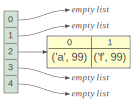

In [19]:
key = 'f'
value = 99
print("hashcode =", hashcode(key))
bucket_index = hashcode(key) % len(table)
print("bucket_index =", bucket_index)
bucket = table[bucket_index]
bucket.append( (key,value) ) # add association to the bucket
lolviz(table)

If we don't indicate we want a simple 2-level list of list with `lolviz()`, we get a generic object graph:

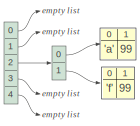

In [20]:
objviz(table)

140547309325184 140547309325184


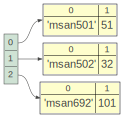

In [21]:
courses = [
    ['msan501', 51],
    ['msan502', 32],
    ['msan692', 101]
]
mycourses = courses
print(id(mycourses), id(courses))
objviz(courses)

You can also display strings as arrays in isolation (but not in other data structures as I figured it's not that useful in most cases):

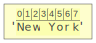

In [22]:
strviz('New York')

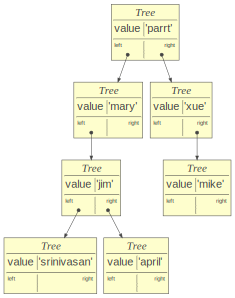

In [23]:
class Tree:
    def __init__(self, value, left=None, right=None):
        self.value = value
        self.left = left
        self.right = right
        
root = Tree('parrt',
            Tree('mary',
                 Tree('jim',
                      Tree('srinivasan'),
                      Tree('april'))),
            Tree('xue',None,Tree('mike')))

treeviz(root)

In [ ]:
class TripleTree:
    def __init__(self, value, left=None, right=None, mid=None):
        self.value = value
        self.left = left
        self.right = right
        self.mid = mid
        
root = TripleTree('parrt',
            TripleTree('mary',[1], [2], [3])) 

treeviz(root, childfields=('left', 'right', 'mid'), show_all_children=True)

In [ ]:
class MultiTree:
    def __init__(self, value, **children):
        self.value = value
        self.children = children

root = MultiTree('parrt',
                left = MultiTree('mary', left=[1], right=[2])
                )

treeplusviz(root, childrenfield="children")

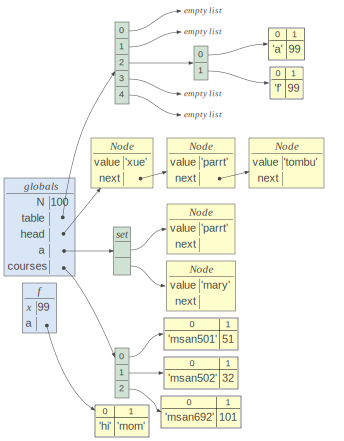

In [24]:
from IPython.display import display

N = 100

def f(x):
    a = ['hi','mom']
    thestack = callsviz(varnames=['table','x','head','courses','N','a'])
    display(thestack)
    
f(99)

If you'd like to save an image from jupyter, use `render()`:

In [25]:
def f(x):
    thestack = callsviz(varnames=['table','x','tree','head','courses'])
    print(thestack.source[:100])  # show first 100 char of graphviz syntax
    thestack.render("/tmp/t") # save as PDF
    
f(99)


    digraph G {
        nodesep=.1;
        ranksep=.1;
        rankdir=LR;
        node [penwidth=


## Numpy viz

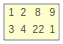

In [26]:
import numpy as np

A = np.array([[1,2,8,9],[3,4,22,1]])
objviz(A)

In [27]:
B = np.ones((100,100))
for i in range(100):
    for j in range(100):
        B[i,j] = i+j
B

array([[  0.,   1.,   2., ...,  97.,  98.,  99.],
       [  1.,   2.,   3., ...,  98.,  99., 100.],
       [  2.,   3.,   4., ...,  99., 100., 101.],
       ...,
       [ 97.,  98.,  99., ..., 194., 195., 196.],
       [ 98.,  99., 100., ..., 195., 196., 197.],
       [ 99., 100., 101., ..., 196., 197., 198.]])

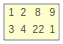

In [28]:
matrixviz(A)

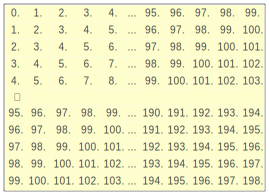

In [29]:
matrixviz(B)

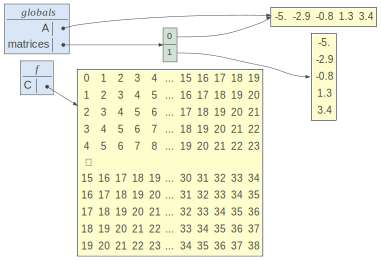

In [30]:
A = np.array(np.arange(-5.0,5.0,2.1))

B = A.reshape(-1,1)

matrices = [A,B]

def f():
    w,h = 20,20
    C = np.ones((w,h), dtype=int)
    for i in range(w):
        for j in range(h):
            C[i,j] = i+j
    display(callsviz(varnames=['matrices','A','C']))

f()

## Pandas dataframes, series

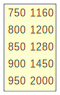

In [31]:
import pandas as pd
df = pd.DataFrame()
df["sqfeet"] = [750, 800, 850, 900,950]
df["rent"] = [1160, 1200, 1280, 1450,2000]
objviz(df)

In [32]:
objviz(df.rent)